## Numpy与Pyhton速度对比

In [4]:
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))
%time for _ in range(10): my_arr2 = my_arr * 2
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 13.1 ms, sys: 7.68 ms, total: 20.8 ms
Wall time: 20.8 ms
CPU times: user 461 ms, sys: 72.1 ms, total: 533 ms
Wall time: 534 ms


结论：基于NumPy的算法通常比它们快10到100倍（或更多）纯Python对应并使用明显更少的内存。

## NumPy 的 ndarray:一种多维数组对象

### 创建随机数据

In [5]:
data = np.random.randn(2,3)

In [6]:
data

array([[ 0.81632389,  1.03033441,  0.02111876],
       [-0.02252218, -0.16542667, -0.04876402]])

In [7]:
# 数学计算
data*10

array([[ 8.16323886, 10.30334409,  0.21118759],
       [-0.22522184, -1.65426669, -0.4876402 ]])

In [8]:
data+data

array([[ 1.63264777,  2.06066882,  0.04223752],
       [-0.04504437, -0.33085334, -0.09752804]])

In [9]:
# 数组的维度
data.shape

(2, 3)

In [10]:
# 数组类型
data.dtype

dtype('float64')

### 创建ndarry

In [11]:
data1 = [6,7.5,8,0,1]

In [12]:
arr1 = np.array(data1)

In [13]:
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [14]:
'''
注意:认为 np.empty 会返回全 0 数组的想法是不安全的。很多情况下(如前所
示),它返回的都是一些未初始化的垃圾值。
'''
np.empty((2,3,2)) # shape=(2,3,2)

array([[[4.66708856e-310, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000]],

       [[0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000]]])

## 数组类型转换

### 整数转浮点数

In [15]:
arr = np.array([1,2,3,4,5])

In [16]:
arr.dtype

dtype('int64')

In [17]:
float_arr = arr.astype(np.float64)

In [18]:
float_arr.dtype

dtype('float64')

In [19]:
float_arr

array([1., 2., 3., 4., 5.])

### 浮点数转整数

In [20]:
arr = np.array([3.7,-1.2,-1.5,-9.3])

In [21]:
arr.dtype

dtype('float64')

In [22]:
int_arr = arr.astype(np.int64)

In [23]:
int_arr.dtype

dtype('int64')

In [24]:
int_arr

array([ 3, -1, -1, -9])

### 字符串数组转数字

In [25]:
# 如果某字符串数组表示的全是数字,也可以用 astype 将其转换为数值形式:
num_str = np.array(['1.25','3.3','6.3','7.8'],dtype=np.string_)

In [26]:
num_str

array([b'1.25', b'3.3', b'6.3', b'7.8'], dtype='|S4')

In [27]:
num_str.astype(float)

array([1.25, 3.3 , 6.3 , 7.8 ])

注意:使用 numpy.string_类型时,一定要小心,因为 NumPy 的字符串数据是
大小固定的,发生截取时,不会发出警告。pandas 提供了更多非数值数据的便
利的处理方法。

如果转换过程因为某种原因而失败了(比如某个不能被转换为 float64 的字符
串),就会引发一个 ValueError。这里,我比较懒,写的是 float 而不是
np.float64;NumPy 很聪明,**它会将 Python 类型映射到等价的 dtype 上**。

### dtype简化

'?' boolean

'b' (signed) byte

'B' unsigned byte

'i' (signed) integer

'u' unsigned integer

'f' floating-point

'c' complex-floating point

'm' timedelta

'M' datetime

'O' (Python) objects

'S', 'a' zero-terminated bytes (not recommended)

'U' Unicode string

'V' raw data (void)

[更多直通点](https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html)

In [28]:
np.dtype('u4')

dtype('uint32')

In [29]:
empty_uint32 = np.empty((2,3),dtype='u4')
empty_uint32

array([[3708198864,      21993,         11],
       [     65537,         15,          1]], dtype=uint32)

调用 astype 总会创建一个新的数组(一个数据的备份),即使新的dtype 与旧的 dtype 相同。

## 数组运算(矢量化)

In [30]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
print(arr)
print(arr2)
arr>arr2

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 0.  4.  1.]
 [ 7.  2. 12.]]


array([[ True, False,  True],
       [False,  True, False]])

### 二维数组索引方式

索引方式根据轴来进行。axis=0 表示行；axis=1 表示列

- 数组索引
- 切片索引
- 布尔型索引
- 花式索引

#### 布尔型索引例子

In [31]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will',
'Joe', 'Joe'])
data = np.random.randn(7, 4)
print(names)
print(data)

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[[-0.86143225  0.6217379   1.11002806 -0.84680416]
 [ 0.43938119  0.72766573  0.19591729 -1.70354057]
 [-1.07485592 -0.12854109 -0.3854124   0.04943098]
 [-1.69964686 -0.47862158  0.22072437  0.05672718]
 [-1.66729194  0.78797667 -2.60562973  0.66319239]
 [ 0.44971151 -0.39087312  2.74703601  1.65103735]
 [ 0.46032072 -0.38888617  0.32324258 -0.90763894]]


In [32]:
# 每个人名字对应一行
names=='Bob' # 对应Bob的为True，否则为False。

array([ True, False, False,  True, False, False, False])

In [33]:
data[names=='Bob'] #布尔型数组可用于数组索引

array([[-0.86143225,  0.6217379 ,  1.11002806, -0.84680416],
       [-1.69964686, -0.47862158,  0.22072437,  0.05672718]])

**注意:如果布尔型数组的长度不对,布尔型选择就会出错,因此一定要小心。**

In [34]:
# 除了==还可以用其他符号。
data[~(names=='Bob')] # 反转

array([[ 0.43938119,  0.72766573,  0.19591729, -1.70354057],
       [-1.07485592, -0.12854109, -0.3854124 ,  0.04943098],
       [-1.66729194,  0.78797667, -2.60562973,  0.66319239],
       [ 0.44971151, -0.39087312,  2.74703601,  1.65103735],
       [ 0.46032072, -0.38888617,  0.32324258, -0.90763894]])

In [35]:
mask = (names=='Bob') | (names=='Will')

In [36]:
mask

array([ True, False,  True,  True,  True, False, False])

In [37]:
data[mask]

array([[-0.86143225,  0.6217379 ,  1.11002806, -0.84680416],
       [-1.07485592, -0.12854109, -0.3854124 ,  0.04943098],
       [-1.69964686, -0.47862158,  0.22072437,  0.05672718],
       [-1.66729194,  0.78797667, -2.60562973,  0.66319239]])

#### 花式索引

In [38]:
arr = np.empty((8, 4))

In [39]:
for i in range(8):
    arr[i] = i

In [40]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [41]:
# 为了以特定顺序选取行子集,只需传入一个用于指定顺序的整数列表或ndarray 即可
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [42]:
# 用负数索引将会从末尾开始选取行:

In [43]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

一次传入多个索引数组会有一点特别。它返回的是一个一维数组,其中的元素对应各个索引元组

In [44]:
arr = np.arange(32).reshape((8, 4))

In [45]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [46]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

这个花式索引的行为可能会跟某些用户的预期不一样(包括我在内),选取矩
阵的行列子集应该是矩形区域的形式才对

In [47]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### 数组和轴变换

In [48]:
arr = np.arange(16).reshape((2, 2, 4))

In [49]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [50]:
arr.T

array([[[ 0,  8],
        [ 4, 12]],

       [[ 1,  9],
        [ 5, 13]],

       [[ 2, 10],
        [ 6, 14]],

       [[ 3, 11],
        [ 7, 15]]])

In [51]:
# 简单的转置可以使用.T,它其实就是进行轴对换而已。ndarray 还有一个swapaxes 方法,它需要接受一对轴编号
arr.swapaxes(1,2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

In [52]:
arr.swapaxes(0,2)
# swapaxes 也是返回源数据的视图(不会进行任何复制操作)

array([[[ 0,  8],
        [ 4, 12]],

       [[ 1,  9],
        [ 5, 13]],

       [[ 2, 10],
        [ 6, 14]],

       [[ 3, 11],
        [ 7, 15]]])

## 数学和统计方法

In [53]:
arr = np.random.randn(5,4)

In [54]:
arr

array([[ 0.67898069, -0.26828582, -0.81258693,  0.76003334],
       [-0.8901697 , -0.15120297,  1.22226769, -1.82836612],
       [ 0.43017922,  0.5084481 , -0.49638644,  0.26086639],
       [ 1.2133704 ,  0.36216502,  0.209637  , -0.75089507],
       [ 0.17365802, -1.84558421, -0.23470711,  0.47822195]])

In [55]:
arr.mean()

-0.04901782671141623

In [56]:
np.mean(arr)

-0.04901782671141623

In [57]:
arr.sum()

-0.9803565342283247

**最外层为axis=0，最内层为axis=1,后面的axis依次加1，keepdims=True维持维度**

参考文章：

[Python · numpy · axis](https://zhuanlan.zhihu.com/p/30960190)

[numpy模块之axis](https://blog.csdn.net/fangjian1204/article/details/53055219)    

In [58]:
# 设置特定轴计算
arr.mean(axis=0)

array([ 0.32120373, -0.27889198, -0.02235515, -0.2160279 ])

In [59]:
X = np.array([[1, 2], [4, 5], [7, 8]])
print(np.sum(X, axis=0, keepdims=True))
print(np.sum(X, axis=1, keepdims=True))

[[12 15]]
[[ 3]
 [ 9]
 [15]]


## 用于数组的文件输入和输出

NumPy 能够读写磁盘上的文本数据或二进制数据。

np.save 和 np.load 是读写磁盘数组数据的两个主要函数。默认情况下,数组
是以未压缩的原始二进制格式保存在扩展名为.npy 的文件中的

In [60]:
arr = np.arange(10)

In [61]:
np.save('some_array', arr)

In [62]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

通过 np.savez 可以将多个数组保存到一个未压缩文件中,将数组以关键字参数
的形式传入即可

In [63]:
np.savez('array_archive.npz',a=arr,b=arr)

In [64]:
arch = np.load('array_archive.npz')

In [65]:
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [66]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

## 矩阵乘法

In [67]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])

In [68]:
x@np.ones(3) # 中缀运算符，进行矩阵乘法

array([ 6., 15.])

In [69]:
t = x.dot(np.ones(3))

numpy.linalg 中有一组标准的矩阵分解运算以及诸如求逆和行列式之类的东
西。它们跟 MATLAB 和 R 等语言所使用的是相同的行业标准线性代数库,如
BLAS、LAPACK、Intel MKL(Math Kernel Library,可能有,取决于你的
NumPy 版本)等:

In [70]:
from numpy.linalg import inv, qr

In [71]:
X = np.random.randn(5,5)

In [72]:
mat = X.T.dot(X)

In [73]:
mat

array([[ 5.90515459,  0.23219976, -1.09230917, -0.05901192,  1.70453404],
       [ 0.23219976,  3.91826914,  1.32917691, -1.35993139, -1.57695436],
       [-1.09230917,  1.32917691,  2.38011576, -0.3531005 , -2.45234923],
       [-0.05901192, -1.35993139, -0.3531005 ,  2.27381441, -1.13913879],
       [ 1.70453404, -1.57695436, -2.45234923, -1.13913879,  6.63128986]])

In [74]:
inv(mat) # 求矩阵逆

array([[ 0.20042724, -0.07712554,  0.07242022, -0.05608762, -0.05271228],
       [-0.07712554,  0.47465352, -0.07981718,  0.3514217 ,  0.16355016],
       [ 0.07242022, -0.07981718,  0.87636514,  0.25577423,  0.3304342 ],
       [-0.05608762,  0.3514217 ,  0.25577423,  0.85860074,  0.34006844],
       [-0.05271228,  0.16355016,  0.3304342 ,  0.34006844,  0.38385989]])

In [75]:
mat.dot(inv(mat))

array([[ 1.00000000e+00, -1.60767620e-17, -4.86823159e-17,
        -2.31879177e-18, -1.17728030e-17],
       [ 6.84240830e-17,  1.00000000e+00, -5.52944766e-17,
         2.30326204e-16, -7.12205229e-17],
       [ 2.00581880e-17, -3.08522636e-17,  1.00000000e+00,
         1.02546304e-17, -5.42407874e-17],
       [-1.30643747e-17,  1.55304493e-16, -1.29387167e-16,
         1.00000000e+00, -8.11674383e-17],
       [-1.24749173e-18, -1.90604319e-16,  3.68801933e-16,
        -7.57383957e-17,  1.00000000e+00]])

In [76]:
q, r = qr(mat) # QR分解，q是正交的，r是上三角形。

In [77]:
q,r

(array([[-0.94525647, -0.10829728, -0.29403568, -0.03725612, -0.08316796],
        [-0.03716894, -0.84872828,  0.39002517, -0.24407375,  0.25804486],
        [ 0.17484933, -0.276381  , -0.66197547,  0.42781316,  0.52134982],
        [ 0.00944622,  0.29435952, -0.19338936, -0.76679685,  0.53655046],
        [-0.27285007,  0.32387964,  0.53461428,  0.40992497,  0.60564339]]),
 array([[-6.24714538,  0.28470536,  2.06505804,  0.37688226, -3.80150816],
        [ 0.        , -4.62910384, -2.56583919,  1.55856838,  3.64401554],
        [ 0.        ,  0.        , -1.97876297, -1.32804335,  4.27262887],
        [ 0.        ,  0.        ,  0.        , -2.02745409,  2.86406093],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  1.57777199]]))

## 伪随机数生成

In [78]:
samples = np.random.normal(size=(4,4))

In [79]:
samples

array([[-1.8943275 , -1.0475463 ,  1.27913484, -0.32765659],
       [-0.90319641,  0.25885074,  0.02564544, -1.30004241],
       [ 0.84282454,  0.77660091, -1.50494256, -0.86478503],
       [-1.18206286,  0.77720903,  0.34918536, -0.1245201 ]])

Python 内置的 random 模块则只能一次生成一个样本值。从下面的测试结果
中可以看出,如果需要产生大量样本值,numpy.random 快了不止一个数量级:

In [80]:
from random import normalvariate

In [81]:
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

682 ms ± 14.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [82]:
%timeit np.random.normal(size=N)

37.8 ms ± 1.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


我们说这些都是伪随机数,是因为它们都是通过算法基于随机数生成器种子,
在确定性的条件下生成的。你可以用 NumPy 的 np.random.seed 更改随机数生成
种子

In [83]:
np.random.seed(1234)

numpy.random 的数据生成函数使用了全局的随机种子。要避免全局状态,你可
以使用 numpy.random.RandomState,创建一个与其它隔离的随机数生成器

In [84]:
rng = np.random.RandomState(1234)

In [85]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

## 示例：随机漫步

In [86]:
import random
position = 0
walk = [position]
steps = 100
for i in range(steps):
        step = 1 if random.randint(0,1) else -1
        position += step
        walk.append(position)

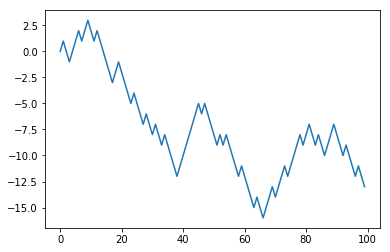

In [87]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(walk[:100])

In [88]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [89]:
walk.min()

-9

In [90]:
walk.max()

60

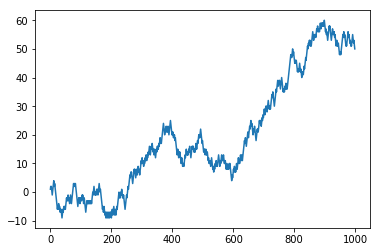

In [91]:
plt.plot(walk)

In [92]:
(np.abs(walk) >= 10).argmax()

297

注意,这里使用 argmax 并不是很高效,因为它无论如何都会对数组进行完全扫
描。在本例中,只要发现了一个 True,那我们就知道它是个最大值了

## 一次模拟多个随机漫步

In [93]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1) # 按照行运算

In [110]:
hits30 = (np.abs(walks) >= 30).any(1)

In [112]:
hits30

array([ True,  True,  True, ...,  True, False,  True])